In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def calc_curves(r_attack, path_to_folder):

    preds                = np.load(path_to_folder + 'preds.npy')
    preds_cohen          = np.load(path_to_folder + 'preds_cohen.npy')
    radii                = np.load(path_to_folder + 'radii.npy')
    new_radii            = np.load(path_to_folder + 'new_radii.npy')
    radii_cohen          = np.load(path_to_folder + 'radii_cohen.npy')
    correct_or_not       = np.load(path_to_folder + 'correct_or_not.npy')
    correct_or_not_cohen = np.load(path_to_folder + 'correct_or_not_cohen.npy')


    cra_old_list = []
    cra_new_list = []
    cra_cohen_list = []
    for r in r_attack:
        cra_old = np.mean((radii  >= r) * correct_or_not)
        cra_new = np.mean((new_radii  >= r) * correct_or_not)
        cra_cohen = np.mean((radii_cohen  >= r) * correct_or_not_cohen)
        cra_old_list.append(cra_old)
        cra_new_list.append(cra_new)
        cra_cohen_list.append(cra_cohen)
        
    return cra_old_list, cra_new_list, cra_cohen_list

In [4]:
def plot_curves(default_values: dict, parameter: str, parameter_legend_name: str, parameter_values: list, *,
                x_max: float = 0.2, colors: list = None, dpi: int = 200, other: bool = False, save: bool = True,
                show: bool = True) -> None:
    
    
    # setting values
    hparams = default_values.copy()
    colors = colors or ['brown', 'blue', 'grey']
    
    # plotting
    plt.figure().set_dpi(dpi)
    r_attack = np.linspace(0, x_max, 400)
    x_lims = []
    
    for i, param_value in enumerate(parameter_values):
        # iterating over changing parameter
        hparams[parameter] = param_value
    
        path_to_folder = './result_arrays_new/'+'__'.join(map(str, hparams.values()))+'/'

        cra_old_list, cra_new_list, cra_cohen_list = calc_curves(hparams, r_attack, path_to_folder)
        
        # plotting
        if other:
            plt.plot(r_attack, cra_cohen_list, label=f"{parameter_legend_name} = {param_value}", linestyle='-', color=colors[i])
            x_lims.append(r_attack[(np.array(cra_cohen_list) != 0).argmin()])
        else:
            plt.plot(r_attack, cra_old_list, label=f"{parameter_legend_name} = {param_value} (SE)", linestyle='--', color=colors[i])
            plt.plot(r_attack, cra_new_list, label=f"{parameter_legend_name} = {param_value} (ours)", linestyle='-', color=colors[i])
            x_lims.append(r_attack[(np.array(cra_new_list) != 0).argmin()])
            
    plt.xlim((0, max(x_lims)+0.0001))
    plt.ylabel('Certified accuracy', fontsize=14)
    plt.xlabel('Attack radius', fontsize=14)

    plt.legend()
    
    plt.tight_layout()   
    
    if save:
        mode = '_other' if other else ''
        graph_name = f"{hparams['model_name']} {parameter.upper()}" + mode
        plt.savefig(f"./Graphs_new/" + graph_name + ".pdf", format='pdf')
    
    if show:
        plt.show()

In [5]:
plt.style.use('ggplot')

# CA($r$)

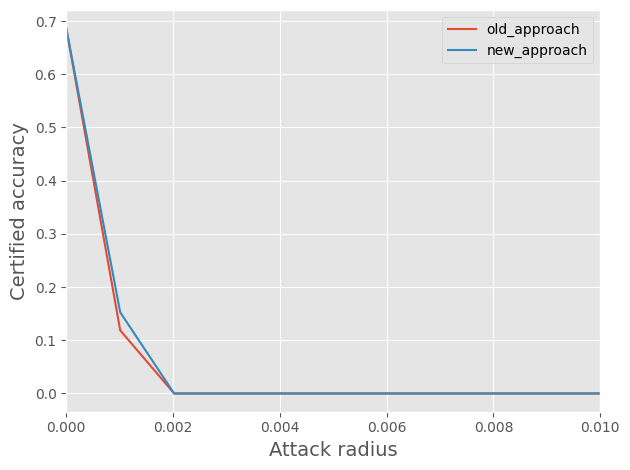

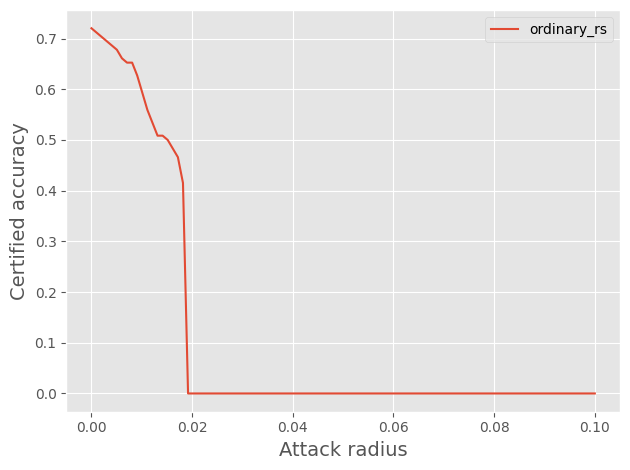

In [7]:
hparams = {'model_name': 'pyannote',
           'sigma': 0.005,
           'alpha': 0.001,
           'num_support_val': 5,
           'N_max': 100000,
           'classes_per_it_val': 1118,
           'audio_len': 3}

path_to_folder = './result_arrays/'+'__'.join(map(str, hparams.values()))+'/'

r_attack = np.linspace(0, 0.1, 100)

cra_old_list, cra_new_list, cra_cohen_list = calc_curves(hparams, r_attack, path_to_folder)    
    
    
plt.plot(r_attack, cra_old_list, label="old_approach")
plt.plot(r_attack, cra_new_list, label="new_approach")
plt.xlim((0, 0.01))
plt.ylabel('Certified accuracy', fontsize=14)
plt.xlabel('Attack radius', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(r_attack, cra_cohen_list, label="ordinary_rs")
plt.ylabel('Certified accuracy', fontsize=14)
plt.xlabel('Attack radius', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# CA multi

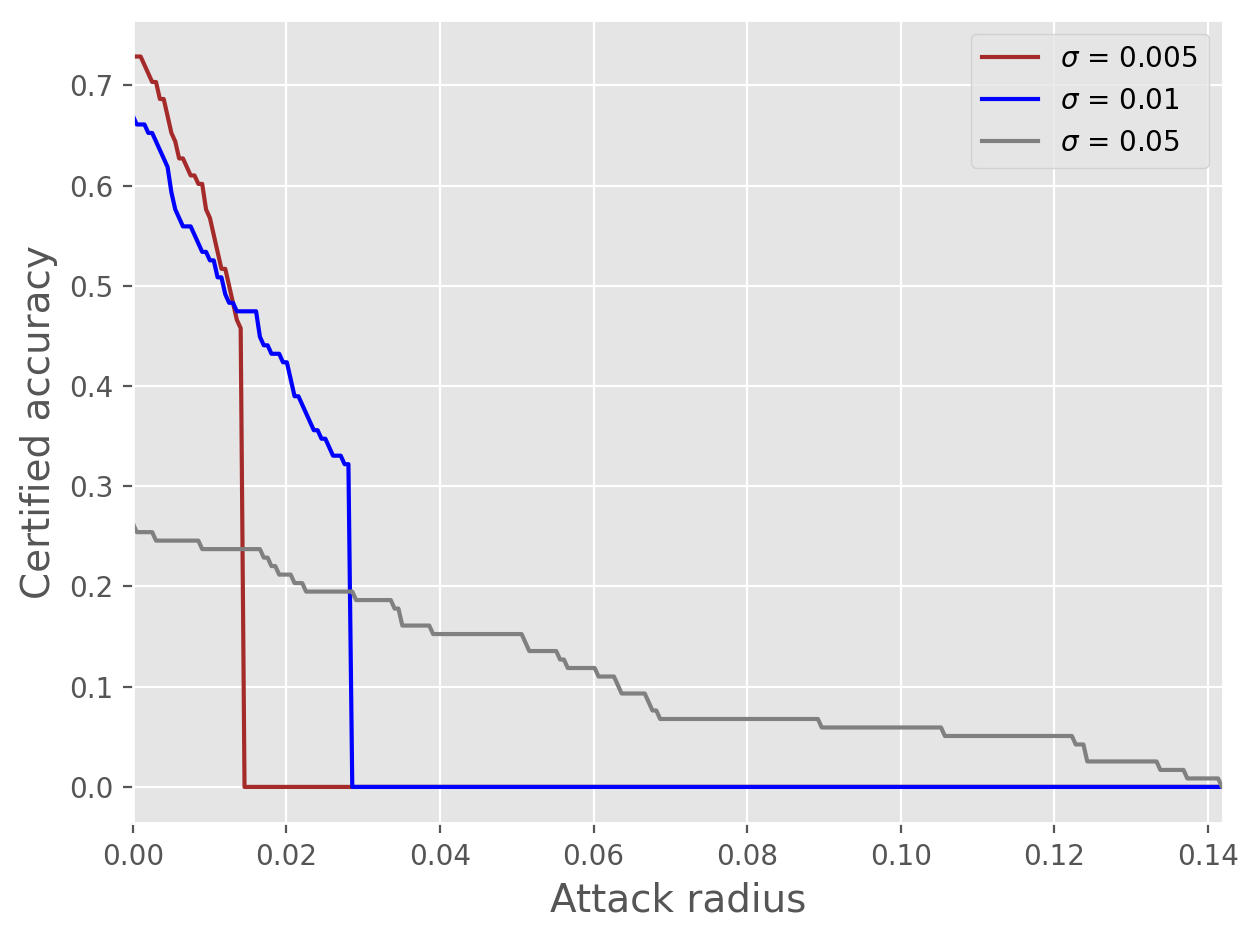

In [11]:
hparams = {'model_name': 'eres2net',
           'sigma': 0.01,
           'alpha': 0.001,
           'num_support_val': 5,
           'N_max': 3000,
           'classes_per_it_val': 1118,
           'audio_len': 3}

plot_curves(hparams, 'sigma', '$\sigma$', [0.005, 0.01, 0.05], save=True, other=True)

# $\text{ERA}$

In [6]:
def read_era(path_to_folder):

    
    era_f      = np.load(path_to_folder + 'era_f.npy')
    results_f  = np.load(path_to_folder + 'results_f.npy')
    results2_f = np.load(path_to_folder + 'results2_f.npy')
    
    era_g      = np.load(path_to_folder + 'era_g.npy')
    results_g  = np.load(path_to_folder + 'results_g.npy')
    results2_g = np.load(path_to_folder + 'results2_g.npy')
    
    return results2_f, results2_g

In [ ]:
hparams = {'model_name': 'ecapa-tdnn',
           'mode': 'normal',
           'num_support_val': 5,
           'audio_len': 3}

param = 'audio_len'
param_legend_name = 'audio lenght (s)'
param_vals = [3, 5]
line_styles = ['--', '-']

plt.figure().set_dpi(200)

for param_val, line_style in zip(param_vals, line_styles):
    hparams[param] = param_val
    path = './result_arrays/ERA/'+'__'.join(map(str, hparams.values()))+'/'
    
    results2_f, results2_g = read_era(path)
    
    x_f = np.linspace(0, 10, results2_f.shape[1])
    x_g = np.linspace(0, 10, results2_g.shape[1])
    
    plt.plot(x_f, results2_f.mean(axis=0), label=f'(f)  {param_legend_name} = {param_val}', color='brown', linestyle=line_style)
    plt.plot(x_g, results2_g.mean(axis=0), label=f'(g) {param_legend_name} = {param_val}', color='blue', linestyle=line_style)
    
    plt.xlabel('Attack level', fontsize=14)
    plt.ylabel('ERA', fontsize=14)
    plt.xlim((0, 10))

plt.legend()
plt.tight_layout()

plt.savefig('./Graphs_new/ERA/era_pgd.pdf', format='pdf')

plt.show()